### Necessary imports

In [2]:
#datasets
from sklearn import datasets
#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
#plotting
import matplotlib.pyplot as plt
#classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#metrics
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, roc_curve

### Load the dataset

In [3]:
bcw = datasets.load_breast_cancer()

### Separate the dataset into features and classes (X and y)

In [4]:
X = bcw.data
y = bcw.target

### Split data into Training (80%) and Testing (20%)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 116)

### Verify the split

In [6]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (455, 30)
X_test shape:  (114, 30)
y_train shape:  (455,)
y_test shape:  (114,)


### Scaling the dataset

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Support Vector Machines Classfication

In [19]:
svc = SVC(probability=True)
kfold = KFold(n_splits = 10)
accuracy_scores = []
for train_index, test_index in kfold.split(X_train):
    X_train1, X_test1 = X_train[train_index,:],X_train[test_index,:]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    svc.fit(X_train1, y_train1)
    y_pred1 = svc.predict(X_test1)
    accuracy_scores.append(f1_score(y_test1, y_pred1))
    
print("K-Fold accuracy scores for SVM Classifier")
k=1;
for score in accuracy_scores:
    print("k=",k,"score =",round((score),3))
    k+=1
print("Average score of KFold", round(sum(accuracy_scores)/len(accuracy_scores),3))
y_pred_svc = svc.predict(X_test)

K-Fold accuracy scores for SVM Classifier
k= 1 score = 0.966
k= 2 score = 0.982
k= 3 score = 0.93
k= 4 score = 0.964
k= 5 score = 0.985
k= 6 score = 1.0
k= 7 score = 0.984
k= 8 score = 0.979
k= 9 score = 0.951
k= 10 score = 1.0
Average score of KFold 0.974


### Decision Tree Classification

In [20]:
dtc = DecisionTreeClassifier()
kfold = KFold(n_splits = 10)
accuracy_scores = []
for train_index, test_index in kfold.split(X_train):
    X_train1, X_test1 = X_train[train_index,:],X_train[test_index,:]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    dtc.fit(X_train1, y_train1)
    y_pred1 = dtc.predict(X_test1)
    accuracy_scores.append(f1_score(y_test1, y_pred1))

print("K-Fold accuracy scores for DTC Classifier")
k=1;
for score in accuracy_scores:
    print("k=",k,"score =",round((score),3))
    k+=1
print("Average score of KFold", round(sum(accuracy_scores)/len(accuracy_scores),3))
y_pred_dtc = dtc.predict(X_test)

K-Fold accuracy scores for DTC Classifier
k= 1 score = 0.949
k= 2 score = 0.964
k= 3 score = 0.933
k= 4 score = 0.909
k= 5 score = 0.937
k= 6 score = 0.939
k= 7 score = 0.933
k= 8 score = 0.93
k= 9 score = 0.9
k= 10 score = 0.982
Average score of KFold 0.938


### Quantifying the results

In [10]:
def quantify_classifications(classification, y_pred, y_test):
    print("Scores for ",classification)
    print("F1 score: ", round(f1_score(y_test, y_pred),3))
    print("Balanced accuracy score: ", round(balanced_accuracy_score(y_test,y_pred),3))
    print("ROC-AUC score: ", round(roc_auc_score(y_test, y_pred),3))
    print("*"*30)

quantify_classifications('SVM Classification',y_pred_svc,y_test)
quantify_classifications('Decision Tree Classifier', y_pred_dtc, y_test)

Scores for  SVM Classification
F1 score:  0.994
Balanced accuracy score:  0.985
ROC-AUC score:  0.985
******************************
Scores for  Decision Tree Classifier
F1 score:  0.943
Balanced accuracy score:  0.91
ROC-AUC score:  0.91
******************************


### Improving the results

In [18]:
dtc = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0,)

kfold = KFold(n_splits = 10)
accuracy_scores = []
for train_index, test_index in kfold.split(X_train):
    X_train1, X_test1 = X_train[train_index,:],X_train[test_index,:]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    dtc.fit(X_train1, y_train1)
    y_pred1 = dtc.predict(X_test1)
    accuracy_scores.append(f1_score(y_test1, y_pred1))

print("Improved K-Fold accuracy scores for Decision Tree Classifier")
k=1;
for score in accuracy_scores:
    print("k=",k,"score =",round((score),3))
    k+=1
print("Average score of KFold", round(sum(accuracy_scores)/len(accuracy_scores),3))
y_pred_dtc = dtc.predict(X_test)

Improved K-Fold accuracy scores for Decision Tree Classifier
k= 1 score = 0.967
k= 2 score = 0.964
k= 3 score = 0.933
k= 4 score = 0.926
k= 5 score = 0.954
k= 6 score = 0.98
k= 7 score = 0.933
k= 8 score = 0.957
k= 9 score = 0.952
k= 10 score = 0.983
Average score of KFold 0.955


### Verifying the results

In [11]:
def quantify_classifications(classification, y_pred, y_test):
    print("Scores for ",classification)
    print("F1 score: ", round(f1_score(y_test, y_pred),3))
    print("Balanced accuracy score: ", round(balanced_accuracy_score(y_test,y_pred),3))
    print("ROC-AUC score: ", round(roc_auc_score(y_test, y_pred),3))
    print("*"*30)

quantify_classifications('SVM Classification',y_pred_svc,y_test)
quantify_classifications('Decision Tree Classifier', y_pred_dtc, y_test)

Scores for  SVM Classification
F1 score:  0.994
Balanced accuracy score:  0.985
ROC-AUC score:  0.985
******************************
Scores for  Decision Tree Classifier
F1 score:  0.943
Balanced accuracy score:  0.91
ROC-AUC score:  0.91
******************************


### Visualizing the Decision Tree

Annotation(748.895, 504.771, 'X[27] <= 0.247\nentropy = 0.435\nsamples = 268\nvalue = [24, 244]')


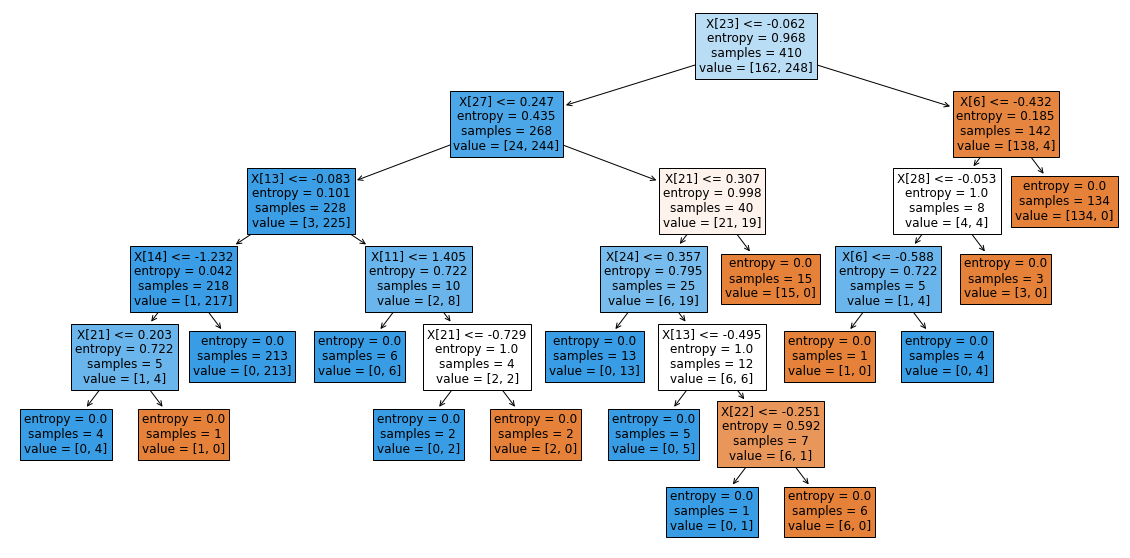

In [12]:
plt.figure(figsize=(20,10))
print(tree.plot_tree(dtc, fontsize=12, filled=True)[1])

### ROC-AUC Curve

### Finding the probabilities

In [13]:
pred_prob_svc = svc.predict_proba(X_test)
pred_prob_dtc = dtc.predict_proba(X_test)

fpr_svc, tpr_svc, thresh_svc = roc_curve(y_test, pred_prob_svc[:,1], pos_label=1)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(y_test, pred_prob_dtc[:,1], pos_label=1) 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

### Plotting the curves

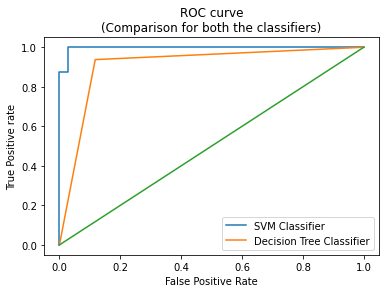

In [14]:
plt.plot(fpr_svc, tpr_svc,label='SVM Classifier')
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree Classifier')
plt.plot(p_fpr, p_tpr)
plt.title('ROC curve\n(Comparison for both the classifiers)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();